<a href="https://colab.research.google.com/github/gabrielafsz/Projetos-Inova-Talentos/blob/main/Caso_Bugey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESUMO DO EXPERIMENTO BUGEY:** Os reatores de energia nuclear são as fontes mais intensas de antineutrinos na
Terra. As oscilações de neutrinos podem ser estudadas perto do reator procurando
uma variação no fluxo observado e no espectro em função da distância. Em Bugey
são utilizados três módulos idênticos para extrair sinais de neutrinos a 15, 40 e 95 metros de distância do reator e as medições poderão ser realizadas
simultaneamente nos dois locais, sendo uma vantagem quanto à redução das
incertezas sistemáticas ao comparar os dados em duas distâncias. Nesse
experimento, observa-se a taxa de sobrevivência dos neutrinos eletrônicos

$P(ν_e→ ν_e) = 1- 4 |U_{e4}|^2|U_{e4}|^2 \sin^2(1.27\frac{\Delta m^2 L}{E_\nu}) = 1- \sin^2 2\theta _{ee} \sin^2 (1.27 \frac{\Delta m^2 L}{E_\nu}) $.

**OBJETIVO:** Conhecendo o fluxo de neutrinos, a energia e a seção de choque do experimento Bugey, encontrar zonas de exclusão para a probabilidade efetiva `prob = 0.915` no ponto de medição ` L=95` m.


**ETAPAS:**

- Na primeira etapa do programa foi considerado as taxas totais de eventos e uma
relação constante entre a energia do pósitron e do neutrino, sendo a energia do
neutrino dada por: $E_\nu \approx E_{e+}+1,8$ MeV. 

- O número de eventos em Bugey foi obtido pelo produto da seção de choque com o fluxo de neutrinos. 

- A seção de choque $\sigma$ foi extraída do experimento e o fluxo de neutrinos $\phi$ foi definido como função da energia do neutrino.

- A probabilidade efetiva foi obtida a partir da razão entre o número de eventos
considerando oscilação e sem oscilação.

- E a região de exclusão foi obtida através do teste de qui-quadrado, que é bastante usado nesse tipo de abordagem para verificar a qualidade do
modelo criado e indicar regiões que podem ser desconsideradas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt
import pandas as pd 
import sympy as sp
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import interp1d

In [ ]:
cs = pd.read_csv('/content/drive/MyDrive/Estudos/crosssection.dat',delim_whitespace=True)
crosssec=cs.to_numpy() 
display(cs)

,Enu,cross-section
0,1.810000,0.059321
1,1.826380,0.140378
2,1.842760,0.195996
3,1.859140,0.244606
4,1.875520,0.290076
...,...,...
496,9.934479,126.447227
497,9.950859,126.910622
498,9.967239,127.374596
499,9.983620,127.839920


In [ ]:
def flux(energy):                       # fluxo de neutrinos
  aa=[[0.870,0.896,0.976,0.793],
      [-0.160,-0.239,-0.162,-0.080],
      [-0.0910,-0.0981,-0.0790,-0.1085]]
  ff=[.570,.295,.078,.057]
  a1=aa[0]        
  a2=aa[1]        
  a3=aa[2]       
  fl=0.          
  for i in range(0,len(aa)):
    fl=fl+ff[i]*np.exp((a1[i]+energy*a2[i]+energy**2.*a3[i])) 
  return fl

In [ ]:
def prob(energy,s22t,deltam,l): # probabilidade de oscilação
  prob = s22t*(np.sin((1.27*deltam*l)/energy))**2 
  return prob

In [ ]:
l_95 = 95            # distância da fonte
de = -0.80999994     # diferança entre a energia do neutrino e do pósitron

# limites de análise
stheta = np.arange(0.01, 1.01 , 0.01)   # seno^2 de 2 theta 
dm = np.arange(0.0001,0.35,0.001)       # delta m^2

enu  = []
for i in range(len(crosssec)):
  energy = crosssec[i,0]
  enu.append(energy)          # energia do neutrino

po   = []
chi2 = []
for j in range(0,len(dm)):
  deltam = dm[j]      # delta m^2
  ptmp = []
  chi  = []
  for k in range(0,len(stheta)):
    s22t = stheta[k]  # seno^2 de 2 theta
    phi  = []  
    phip = []   
    for i in range(0,len(crosssec)):
      energy=enu[i]
      phi.append(flux(energy)*crosssec[i,1]) # phi = fluxo x seção de choque
      phip.append(flux(energy)*prob(energy,s22t,deltam,l_95)*crosssec[i,1])
    
    # número de eventos 
    ntot1 = simps(phi,enu)    # sem oscilação prob=1
    ntot2 = simps(phip,enu)   # com oscilação
    ptmp.append(1.-ntot2/ntot1)
    chi.append((0.915-(1.-ntot2/ntot1))**2/((0.132)**2+(0.05)**2)**1)

  po.append(ptmp)    # probabilidade efetiva 
  chi2.append(chi)   # teste qui-quadrado
x, y = np.meshgrid(stheta,dm)

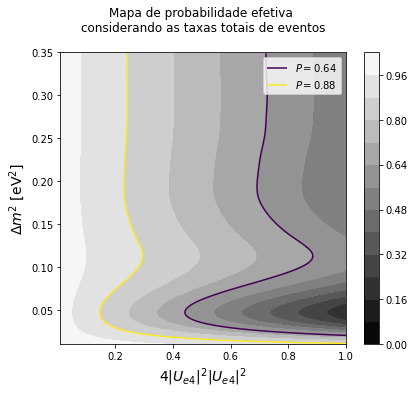

In [ ]:
# z = prob
levels = MaxNLocator(nbins=15).tick_values(0, 1)
cmap = plt.get_cmap('gray')
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 5))
cf = ax1.contourf(x, y, po, levels=levels, cmap=cmap)   
ax1.set_xlabel(r'$4 |U_{e4}|^2|U_{e4}|^2$', fontsize=14)
ax1.set_ylabel(r'$\Delta m^2$ [eV$^2$]',fontsize=14)
ax1.set_ylim(1e-2, 0.35)
ax1.set_xlim(1e-2, 1)
fig.colorbar(cf, ax=ax1)
CS = plt.contour(x,y, po,[0.64, 0.88]) 
fig.tight_layout()
plt.clabel(CS, inline=False, fontsize=0)
labels = ['$P = 0.64$','$P = 0.88$']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
plt.legend()
plt.title('Mapa de probabilidade efetiva \n' 
'considerando as taxas totais de eventos\n')
plt.show()

A barra de cores representa as probabilidades efetivas de 0 a 1 para cada conjunto de dados (Δm², sin²2θ).

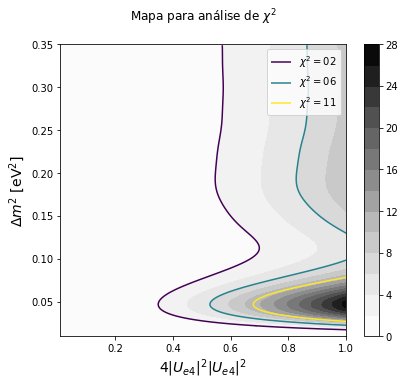

In [ ]:
# z = chi2
levels = MaxNLocator(nbins=15).tick_values(0, 27) 
cmap = plt.get_cmap('Greys')
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 5))
cf = ax1.contourf(x, y, chi2, levels=levels, cmap=cmap)   
ax1.set_xlabel(r'$4 |U_{e4}|^2|U_{e4}|^2$',fontsize=14)
ax1.set_ylabel(r'$\Delta m^2$ [eV$^2$]',fontsize=14)
ax1.set_ylim(1e-2, 0.35)
ax1.set_xlim(1e-2, 1)
fig.colorbar(cf, ax=ax1)
CS = plt.contour(x,y,chi2,[2., 6., 11.]) 
fig.tight_layout()
plt.clabel(CS, inline=False, fontsize=0)
labels = ['$\chi^2 = 02$','$\chi^2 = 06$','$\chi^2 = 11$']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
plt.legend()
plt.title('Mapa para análise de $\chi ^2$\n')
plt.show()

O teste χ² avalia a qualidade do modelo criado, nesse usamos o valor experimental obtido para a probabilidade (P=0.915) e os erros a cerca do experimento. Quanto maior
o valor χ² mais distante o
modelo está do dado
experimental e a região à direita deve ser excluída. Adotaremos nesse projeto exclusões a partir de χ²= 2 com base na literatura.